# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

## **Simple Linear Regression**

In [8]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [9]:
# Import Dataset
df_house = pd.read_csv('data/house-price.csv', sep =";")
df_house

,house_price,square_feet
0,245,1400
1,312,1600
2,279,1700
3,308,1875
4,199,1100
5,219,1550
6,405,2350
7,324,2450
8,319,1425
9,255,1700


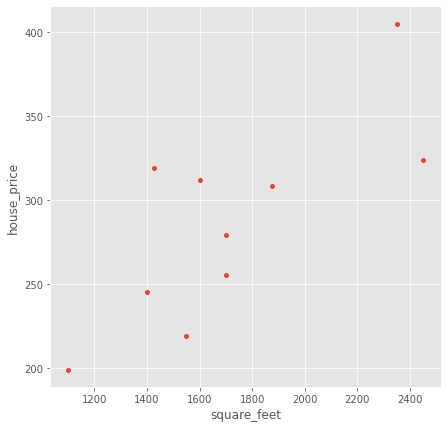

In [10]:
# Visualize the data using scatterplot
sns.scatterplot(x="square_feet", y="house_price", data= df_house)


### **Regression using Sklearn**

In [11]:
X = df_house[['square_feet']]
Y = df_house['house_price']

In [12]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [24]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 339.7965558571648
Coefficients: 
 [ -2.25541919 -26.92659652  73.46399119]


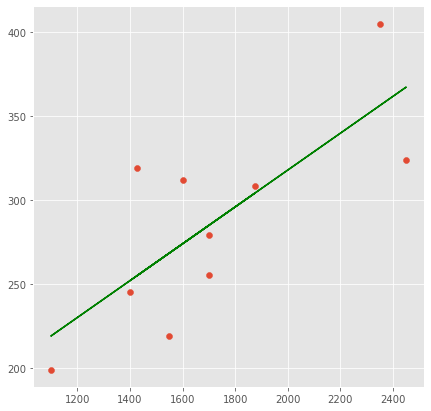

In [14]:
# Visualizing Linear Regression
plt.scatter(X, Y)
plt.plot(X, regr.predict(X), color = "green")
plt.show()

In [15]:
# prediction with sklearn
new_square_feet = 2000
print ('Predicted  house price: \n', regr.predict([[new_square_feet]]))

Predicted  house price: 
 [317.78380528]


### **Regression using Statsmodels**

In [16]:
X = sm.add_constant(X) # adding a constant

In [17]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     11.08
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0104
Time:                        16:18:50   Log-Likelihood:                -50.290
No. Observations:                  10   AIC:                             104.6
Df Residuals:                       8   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          98.2483     58.033      1.693      

In [39]:
#Pie Sales
df_pie = pd.read_csv('data/pie-sales.csv', sep =";")
df_pie.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


In [42]:
X = df_pie[['week','price','advertising']]
# X = df_pie[['week']]
Y = df_pie['pie_sales']

In [43]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [44]:
print('Intercept: \n', regr.intercept_)

print('Coefficients: \n', regr.coef_)

Intercept: 
 339.7965558571648
Coefficients: 
 [ -2.25541919 -26.92659652  73.46399119]


In [55]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     4.398
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0290
Time:                        16:46:59   Log-Likelihood:                -77.126
No. Observations:                  15   AIC:                             162.3
Df Residuals:                      11   BIC:                             165.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         339.7966    124.282      2.734      

In [56]:
print(model.rsquared, model.rsquared_adj)

0.5453573335692508 0.4213638790881373


In [52]:
df_pie['pie_sales_pred'] = predictions

In [54]:
df_pie[['week','price','advertising','pie_sales','pie_sales_pred']]

,week,price,advertising,pie_sales,pie_sales_pred
0,1,5.5,3.3,350,431.876027
1,2,7.5,3.3,460,375.767414
2,3,8.0,3.0,350,338.009500
3,4,8.0,4.5,430,445.950067
4,5,6.8,3.0,350,365.810577
5,6,7.5,4.0,380,418.170532
6,7,4.5,3.0,430,423.230911
7,8,6.4,3.7,470,421.239752
8,9,7.0,3.5,450,388.135577
9,10,5.0,4.0,490,476.465346


In [38]:
# # Visualizing Linear Regression
# plt.scatter(X, Y)
# plt.plot(X, regr.predict(X), color = "green")
# plt.show()

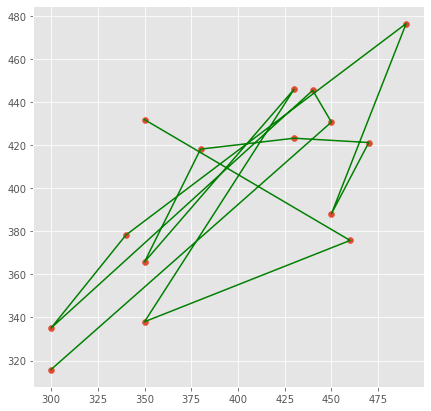

In [59]:
# Visualizing Linear Regression
# df_pie[['week','price','advertising','pie_sales','pie_sales_pred']]
plt.scatter(df_pie['pie_sales'], df_pie['pie_sales_pred'])
plt.plot(df_pie['pie_sales'], df_pie['pie_sales_pred'], color = "green")
plt.show()